In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


In [9]:
df=pd.read_csv(r"C:\ML\Proposals\Municipal Debt risk\Data\MunicipalDebtAnalysis.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138509 entries, 0 to 138508
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   accountcategoryid  138509 non-null  int64  
 1   accountcategory    138509 non-null  object 
 2   acccatabbr         138509 non-null  object 
 3   propertyvalue      138509 non-null  int64  
 4   propertysize       138509 non-null  int64  
 5   totalbilling       138509 non-null  int64  
 6   avgbilling         138509 non-null  int64  
 7   totalreceipting    138509 non-null  int64  
 8   avgreceipting      138509 non-null  int64  
 9   total90debt        138509 non-null  int64  
 10  totalwriteoff      138509 non-null  int64  
 11  collectionratio    138509 non-null  float64
 12  debtbillingratio   138509 non-null  float64
 13  totalelecbill      138509 non-null  int64  
 14  hasidno            138509 non-null  int64  
 15  baddebt            138509 non-null  int64  
dtypes:

In [12]:
df.drop(['accountcategoryid'],inplace=True,axis=1)

In [13]:
df.describe()

,propertyvalue,propertysize,totalbilling,avgbilling,totalreceipting,avgreceipting,total90debt,totalwriteoff,collectionratio,debtbillingratio,totalelecbill,hasidno,baddebt
count,1.385090e+05,1.385090e+05,1.385090e+05,138509.000000,1.385090e+05,1.385090e+05,1.385090e+05,1.385090e+05,1.385090e+05,1.385090e+05,1.385090e+05,138509.000000,138509.000000
mean,6.843086e+05,7.338353e+05,1.078807e+04,555.341494,9.474192e+03,1.938527e+03,9.677015e+03,5.729232e+02,1.362839e+01,1.684157e+01,4.221014e+03,0.424268,0.461854
std,2.805861e+06,5.771966e+06,1.298357e+05,5886.614845,1.155675e+05,3.234044e+04,6.915839e+04,1.247832e+04,4.746281e+03,5.432285e+03,1.022517e+05,0.494233,0.498545
min,0.000000e+00,0.000000e+00,-4.232630e+06,-79384.000000,-2.192600e+05,-2.192600e+05,0.000000e+00,0.000000e+00,-1.150000e+05,-4.365060e+05,-2.957700e+05,0.000000,0.000000
25%,3.340000e+04,2.740000e+02,4.290000e+02,23.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,8.280000e+04,4.890000e+02,2.991000e+03,104.000000,2.800000e+02,8.200000e+01,0.000000e+00,0.000000e+00,3.900000e-01,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,7.270000e+05,1.140000e+03,8.488000e+03,275.000000,7.037000e+03,7.340000e+02,2.251000e+03,0.000000e+00,1.000000e+00,1.310000e+00,0.000000e+00,1.000000,1.000000
max,4.218600e+08,4.446375e+08,2.613362e+07,805044.000000,2.437113e+07,6.828297e+06,1.309134e+07,4.306605e+06,1.701912e+06,1.836304e+06,2.271169e+07,1.000000,1.000000


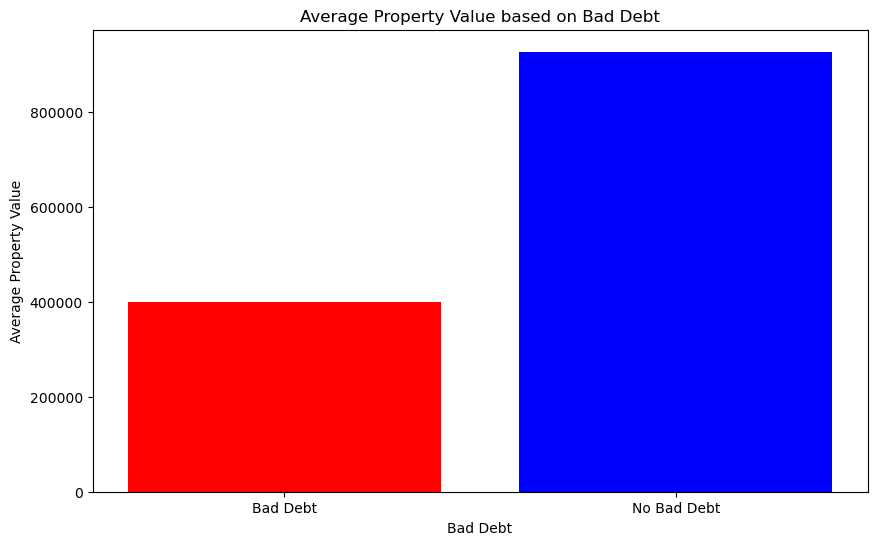

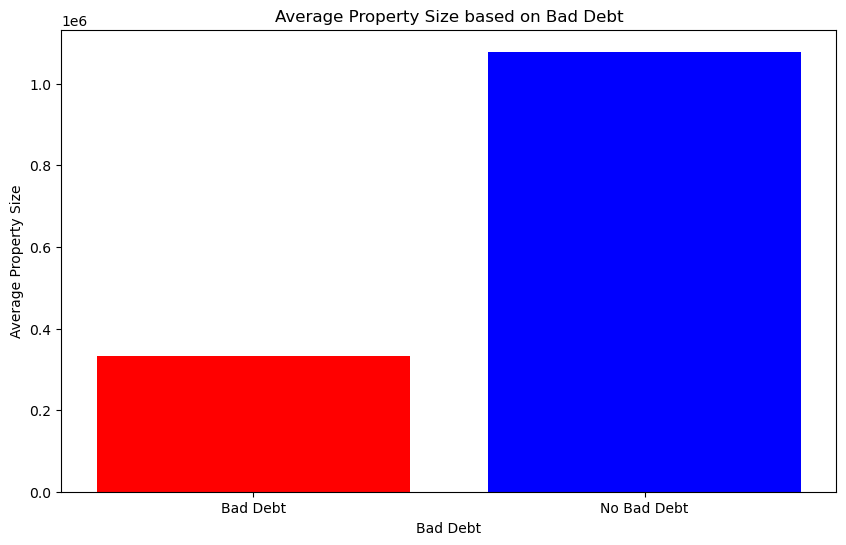

In [16]:
import matplotlib.pyplot as plt

# Calculate the average values for each column based on baddebt
avg_property_value_bad_debt = bad_debts['propertyvalue'].mean()
avg_property_size_bad_debt = bad_debts['propertysize'].mean()
avg_debt_billing_ratio_bad_debt = bad_debts['debtbillingratio'].mean()

avg_property_value_no_bad_debt = no_bad_debts['propertyvalue'].mean()
avg_property_size_no_bad_debt = no_bad_debts['propertysize'].mean()
avg_debt_billing_ratio_no_bad_debt = no_bad_debts['debtbillingratio'].mean()

# Create bar plots
plt.figure(figsize=(10, 6))

# Bar plot for property value
plt.bar(['Bad Debt', 'No Bad Debt'], [avg_property_value_bad_debt, avg_property_value_no_bad_debt], color=['red', 'blue'])
plt.xlabel('Bad Debt')
plt.ylabel('Average Property Value')
plt.title('Average Property Value based on Bad Debt')
plt.show()

# Bar plot for property size
plt.figure(figsize=(10, 6))
plt.bar(['Bad Debt', 'No Bad Debt'], [avg_property_size_bad_debt, avg_property_size_no_bad_debt], color=['red', 'blue'])
plt.xlabel('Bad Debt')
plt.ylabel('Average Property Size')
plt.title('Average Property Size based on Bad Debt')
plt.show()


In [15]:
df['baddebt'].value_counts()

baddebt
0    74538
1    63971
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import time

# Convert categorical variables to numeric using Label Encoder
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target (y)
X = df.drop(columns=['baddebt'])
y = df['baddebt']

# Scale the features only
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int', 'float']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost classifier
start_time = time.time()
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
catboost_training_time = time.time() - start_time

# Train MLP classifier
start_time = time.time()
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_training_time = time.time() - start_time

# Train Random Forest classifier
start_time = time.time()
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Evaluate models
models = {
    'CatBoost': catboost_model,
    'MLP': mlp_model,
    'Random Forest': rf_model
}


Learning rate set to 0.076907
0:	learn: 0.4625636	total: 42.1ms	remaining: 42s
1:	learn: 0.3146892	total: 75.7ms	remaining: 37.8s
2:	learn: 0.2152007	total: 104ms	remaining: 34.5s
3:	learn: 0.1531774	total: 134ms	remaining: 33.3s
4:	learn: 0.1105429	total: 165ms	remaining: 32.8s
5:	learn: 0.0839460	total: 191ms	remaining: 31.6s
6:	learn: 0.0648759	total: 225ms	remaining: 31.9s
7:	learn: 0.0511358	total: 260ms	remaining: 32.3s
8:	learn: 0.0420480	total: 290ms	remaining: 31.9s
9:	learn: 0.0353994	total: 317ms	remaining: 31.4s
10:	learn: 0.0304564	total: 346ms	remaining: 31.1s
11:	learn: 0.0269236	total: 382ms	remaining: 31.5s
12:	learn: 0.0241149	total: 416ms	remaining: 31.5s
13:	learn: 0.0221527	total: 446ms	remaining: 31.4s
14:	learn: 0.0201760	total: 472ms	remaining: 31s
15:	learn: 0.0189301	total: 507ms	remaining: 31.2s
16:	learn: 0.0179090	total: 532ms	remaining: 30.8s
17:	learn: 0.0171418	total: 561ms	remaining: 30.6s
18:	learn: 0.0164991	total: 597ms	remaining: 30.8s
19:	learn: 0.

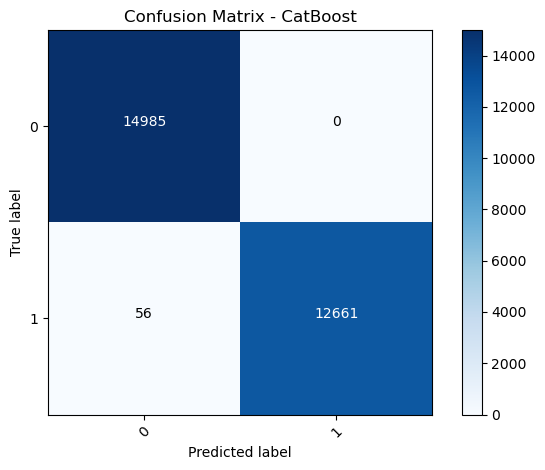

Classification Report - CatBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14985
           1       1.00      1.00      1.00     12717

    accuracy                           1.00     27702
   macro avg       1.00      1.00      1.00     27702
weighted avg       1.00      1.00      1.00     27702



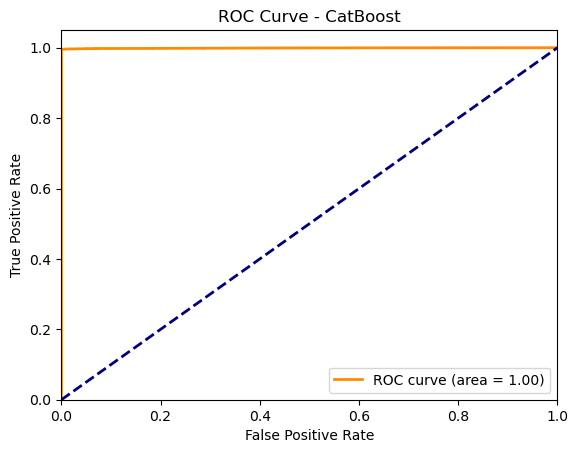

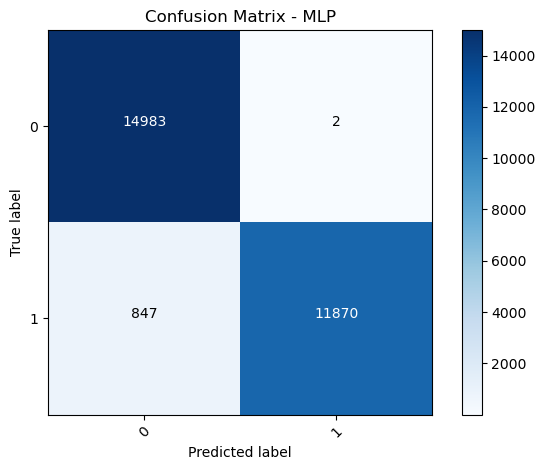

Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14985
           1       1.00      0.93      0.97     12717

    accuracy                           0.97     27702
   macro avg       0.97      0.97      0.97     27702
weighted avg       0.97      0.97      0.97     27702



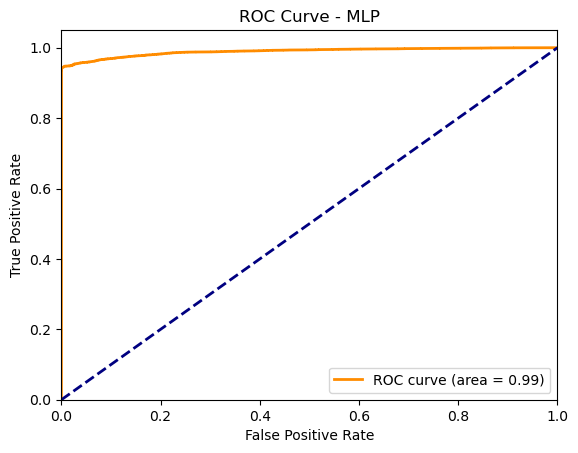

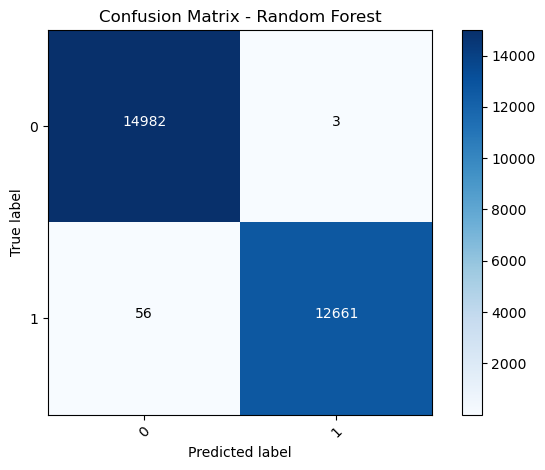

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14985
           1       1.00      1.00      1.00     12717

    accuracy                           1.00     27702
   macro avg       1.00      1.00      1.00     27702
weighted avg       1.00      1.00      1.00     27702



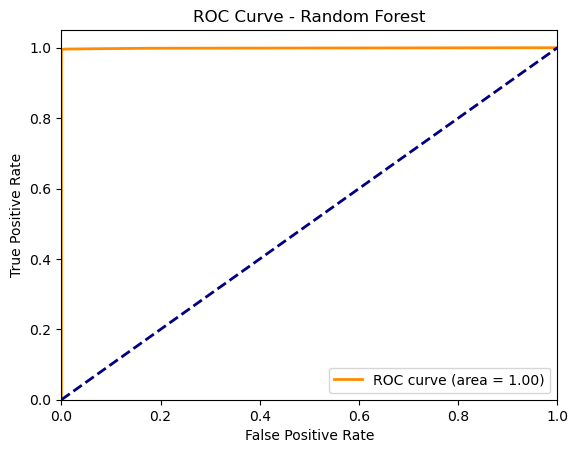

CatBoost Training Time: 24.171295881271362 seconds
MLP Training Time: 312.73065996170044 seconds
Random Forest Training Time: 26.231812238693237 seconds


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Iterate over models
for name, model in models.items():
    # Plot confusion matrix
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, classes=np.unique(y_test))
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Print classification report
    print(f'Classification Report - {name}:')
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

# Print training times
print(f'CatBoost Training Time: {catboost_training_time} seconds')
print(f'MLP Training Time: {mlp_training_time} seconds')
print(f'Random Forest Training Time: {rf_training_time} seconds')
